# Tag Evolution

Author:
- Reinaldo Augusto

Status:
- DONE

Goal:
- To create a function that shows how the tags changed during the time.

In [1]:
from util import agg_jsonls
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

%matplotlib inline

## Importing the ReclameAqui dataset

In [2]:
from src.maps import tag_map, relative_date
from src.cleaning import build_df_from_RA, format_GB_to_df
from src.loading import load_dataset

reviewsRA = load_dataset("final_dataset_RA")
df_RA = build_df_from_RA(reviewsRA)
print(f"We have a total of {len(reviewsRA)} reviews!")

We have a total of 51655 reviews!


In [5]:
df_RA['datetime'] = pd.to_datetime(df_RA.datetime)
df_RA['month'] = df_RA['datetime'].dt.strftime('%m/%Y')
df_RA.head()

,business_issues,business_issues_Customer Services,business_issues_Delivery,business_issues_Maintenance,business_issues_Online Services,business_issues_Payment,business_name,city,datetime,days_to_first_contact,...,products_Home Appliances,products_Others,resolution_outcome,review_ID,service_grade,timeCaptured,title,uf,would_buy_again,month
0,NaN,NaN,NaN,NaN,NaN,NaN,Tok&Stok - Loja Online,Embu das Artes,2020-03-26 12:48:00+00:00,NaN,...,NaN,NaN,NaN,102002173,NaN,2020-03-27T12:08:11Z,Paguei e nao recebi,SP,NaN,03/2020
1,1.0,NaN,1.0,NaN,NaN,NaN,Tok&Stok - Loja Online,Cuiabá,2020-03-26 22:09:00+00:00,NaN,...,NaN,NaN,NaN,102028063,NaN,2020-03-27T12:08:11Z,Não entregaram o móvel,MT,NaN,03/2020
2,1.0,NaN,NaN,NaN,NaN,1.0,Tok&Stok - Loja Online,Rio de Janeiro,2020-03-25 16:50:00+00:00,NaN,...,NaN,NaN,NaN,101970443,NaN,2020-03-27T12:08:14Z,Não recebi um dos itens do meu pedido e fui co...,RJ,NaN,03/2020
3,NaN,NaN,NaN,NaN,NaN,NaN,Tok&Stok - Loja Online,Acopiara,2020-03-25 16:52:00+00:00,NaN,...,NaN,NaN,NaN,101970555,NaN,2020-03-27T12:08:14Z,Produto não foi entregue e não resolvem,CE,NaN,03/2020
4,3.0,2.0,NaN,NaN,NaN,1.0,Tok&Stok - Loja Online,Vila Velha,2020-03-25 20:20:00+00:00,NaN,...,NaN,NaN,NaN,101979855,NaN,2020-03-27T12:08:14Z,Não entregaram e produto e não devolvem o valo...,ES,NaN,03/2020


## Importing the Google Business dataset

In [4]:
unique_ids = set()
reviewsGB = []
for complaint in agg_jsonls("final_dataset_GB_0105"):
    if "id_review" in complaint and complaint["id_review"] not in unique_ids:
        unique_ids.add(complaint["id_review"])
        reviewsGB.append(complaint)

print(f"We have a total of {len(reviewsGB)} reviews!")

We have a total of 10199 reviews!


In [6]:
df_GB = pd.DataFrame([format_GB_to_df(row) for row in reviewsGB])
df_GB['year'] = df_GB['date_comment'].dt.year
df_GB['month'] = df_GB['date_comment'].dt.strftime('%m/%Y')
df_GB['week'] = df_GB['date_comment'].dt.week
df_GB.head()

,business_issues,business_issues_Customer Services,business_issues_Delivery,business_issues_Maintenance,business_issues_Online Services,business_issues_Payment,caption,date_comment,id_review,latitude,...,rating,relative,relative_date,retrieval_date,store,url_user,username,year,month,week
0,NaN,NaN,NaN,NaN,NaN,NaN,Vende eletros domésticos quebrado. Comprei um...,2020-01-16 05:33:14,ChZDSUhNMG9nS0VJQ0FnSURNNXBERUFREAEaFjZwVEFadG...,-23.5975251,...,2.0,90,3 meses atrás,2020-04-15T05:33:14Z,magazine-luiza,https://www.google.com/maps/contrib/1078399353...,Mercia Oliveira,2020,01/2020,3
1,NaN,NaN,NaN,NaN,NaN,NaN,Som muito alto,2019-12-17 05:33:21,ChdDSUhNMG9nS0VJQ0FnSUNNdjhMWHF3RRABGhZ2bHdkUX...,-23.5975251,...,1.0,120,4 meses atrás,2020-04-15T05:33:21Z,magazine-luiza,https://www.google.com/maps/contrib/1096235498...,Wendy Castiello,2019,12/2019,51
2,1.0,NaN,1.0,NaN,NaN,NaN,Péssimo atendimento e não tem telefone para at...,2019-12-17 05:33:21,ChZDSUhNMG9nS0VJQ0FnSUNNdDVidE5nEAEaFmE3R1pMTG...,-23.5975251,...,1.0,120,4 meses atrás,2020-04-15T05:33:21Z,magazine-luiza,https://www.google.com/maps/contrib/1136403911...,Gilberto Alves,2019,12/2019,51
3,1.0,1.0,NaN,NaN,NaN,NaN,Péssima.. Pessoas descompromissadas...me impe...,2019-11-17 05:33:41,ChdDSUhNMG9nS0VJQ0FnSUQwdE5QTzVRRRABGhZVOThjbX...,-23.5975251,...,1.0,150,5 meses atrás,2020-04-15T05:33:41Z,magazine-luiza,https://www.google.com/maps/contrib/1074240831...,Anderson Freire Carniel,2019,11/2019,46
4,3.0,1.0,1.0,1.0,NaN,NaN,Bom atendimento.,2019-11-17 05:33:41,ChdDSUhNMG9nS0VJQ0FnSUQwa083dHdnRRABGhYwY000cj...,-23.5975251,...,1.0,150,5 meses atrás,2020-04-15T05:33:41Z,magazine-luiza,https://www.google.com/maps/contrib/1176573277...,Helena Stauber,2019,11/2019,46


## Creating the tag evolution function

The objective here is to create a function that changes the result based on what the client of our Dashboard wants. So if he wants to see the evolution of a macro or micro tag of a specific store or company, he will just choose on the options we will show him.

To create this big function that will be in our Dashboard, we should divide it into smaller functions so it makes easier to understand what's going on.

### Macro Tag Function

We will first make a macro tag function. There, the client can choose which store, the macro issue and the dataset (he will choose indirectly between ReclameAqui or GoogleBusiness).

In [8]:
def evolution_tag_macro(store='',macro_issue='',dataset='RA'):
    if(dataset=='RA'):
        agg = df_RA.groupby(['business_name','month']).agg({'business_issues':['sum', 'count'],
                                                          'product_issues':['sum', 'count'],
                                                          'datetime':'max'}) 
        
        date_df = df_RA.groupby(['month']).agg({'business_issues':['sum', 'count'],'product_issues':['sum', 'count'],
                                             'datetime':'max'})
         
    elif(dataset=='GB'):
        agg = df_GB.groupby(['store','month']).agg({'business_issues':['sum', 'count'],'product_issues':['sum', 'count'],
                                                  'date_comment':'max'})
        date_df = df_GB.groupby(['month']).agg({'business_issues':['sum', 'count'],'product_issues':['sum', 'count'],
                                              'date_comment':'max'})
        
    df_agg = pd.DataFrame(agg.to_records())
    df_agg.columns = ['business_name','date','business_issues', 'business_issues_count',
                      'product_issues', 'product_issues_count','datetime']
    df_agg['Total']=df_agg['business_issues']+df_agg['product_issues']
    
    date_df = pd.DataFrame(date_df.to_records())
    date_df.columns = ['date','business_issues', 'business_issues_count','product_issues', 
                       'product_issues_count','datetime']
    date_df['Total']=date_df['business_issues']+date_df['product_issues']
    
    mean_qtd = len(df_agg['business_name'].unique()) 
    date_df['product_issues_mean']=date_df['product_issues']/mean_qtd
    date_df['business_issues_mean']=date_df['business_issues']/mean_qtd
    date_df['Total_mean']=date_df['Total']/mean_qtd
    
    if(macro_issue==''):
        if(store==''):
            plt.plot('date', 'Total',data=date_df[(date_df['Total']>0)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            plt.title('Total Sector Problems')
            plt.xticks(rotation=90)
        else: 
            date_min = min(df_agg[df_agg['business_name']==store]['datetime'])
            fig, ax = plt.subplots(figsize=(6,6))
            plt.plot('date', 'Total',data=df_agg[(df_agg['business_name']==store)&(df_agg['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            ax.plot('date', 'Total_mean',data=date_df[(date_df['datetime']>=date_min)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            plt.title('Total Problems - '+store)
            plt.legend([store, 'Sector Average'])
            plt.xticks(rotation=90)
    else:
        if(store==''):
            plt.plot('date', macro_issue,data=date_df[(date_df['Total']>0)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            plt.title('Total Sector '+macro_issue)
            plt.xticks(rotation=90)
        else: 
            date_min = min(df_agg[df_agg['business_name']==store]['datetime'])
            fig, ax = plt.subplots(figsize=(6,6))
            plt.plot('date', macro_issue,data=df_agg[(df_agg['business_name']==store)&(df_agg['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            ax.plot('date', macro_issue+'_mean',data=date_df[(date_df['datetime']>=date_min)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            plt.title(macro_issue+' - '+store)
            plt.legend([store, 'Sector Average'])
            plt.xticks(rotation=90)

        

### Micro Tag Function

Next, we will make a micro tag function. There, the client also can choose which store, the micro issue and the dataset (he will choose indirectly between ReclameAqui or GoogleBusiness).

In [9]:
def evolution_tag_micro(store='',issue='',dataset='RA'):
    if(dataset=='RA'):
        agg = df_RA.groupby(['business_name','month']).agg({'datetime':'max', issue: ['sum', 'count']}) 
        
        date_df = df_RA.groupby(['month']).agg({'datetime':'max', issue: ['sum', 'count']})
         
    elif(dataset=='GB'):
        agg = df_GB.groupby(['store','month']).agg({'date_comment':'max', issue: ['sum', 'count']})
        date_df = df_GB.groupby(['month']).agg({'date_comment':'max', issue: ['sum', 'count']})
        
    df_agg = pd.DataFrame(agg.to_records())
    df_agg.columns = ['business_name','date','datetime',issue, issue+'_count']
    
    date_df = pd.DataFrame(date_df.to_records())
    date_df.columns = ['date','datetime',issue, issue+'_count']
    
    mean_qtd = len(df_agg['business_name'].unique()) 

    date_df[issue+'_mean']=date_df[issue]/mean_qtd
    
    if(issue!=''):
        if(store==''):
            plt.plot('date', issue,data=date_df[(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            plt.title('Total Sector '+issue)
            plt.xticks(rotation=90)
        else: 
            date_min = min(df_agg[df_agg['business_name']==store]['datetime'])
            fig, ax = plt.subplots(figsize=(6,6))
            plt.plot('date', issue,data=df_agg[(df_agg['business_name']==store)&(df_agg['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            ax.plot('date', issue+'_mean',data=date_df[(date_df['datetime']>=date_min)&(date_df['datetime'].dt.year>=2019)].sort_values(by='datetime'),marker='.')
            plt.title(issue+' - '+store)
            plt.legend([store, 'Sector Average'])
            plt.xticks(rotation=90)

        

### Joining these two functions

In [55]:
def evolucao_tag(store='',macro_issue='',issue='',dataset='RA'):
    if(issue==''):
        evolucao_tag_macro(store, macro_issue, dataset)
    else:
        evolucao_tag_micro(store, issue, dataset)

### Examples

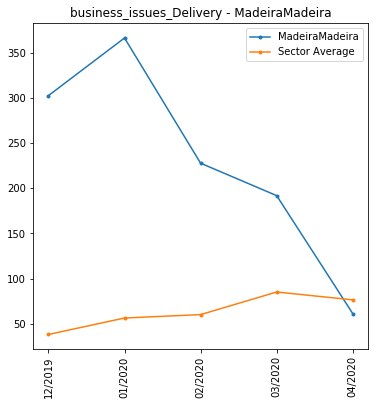

In [56]:
evolucao_tag(store='MadeiraMadeira', issue='business_issues_Delivery')

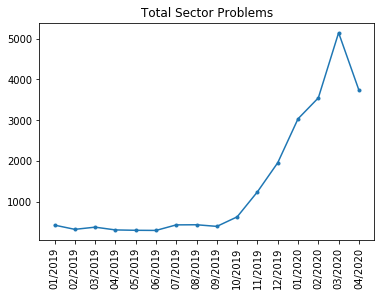

In [57]:
evolucao_tag()